# Correlation and Causation

_This will allow you to put quantitative power behind the insights you get from your visualizations and may be particularly helpful for answering parts of big question 3._

What does it mean to for two variables to be correlated? 

It means that two quantities share an associated relationship. Quantities can be positively correlated so that as one increases, so does the other or negatively correlated so that an increase in one may correlate to a decrease in the other. A correlation between two quantities does not mean than the change in one is caused by the change in the other. Both quantities could be changing because of other unexplored factors that may or may not be causally related. 

For example, global average temperatures can be shown to have a negative correlation to the number of practicing global maritime pirates.  https://www.linkedin.com/pulse/pirates-global-warming-correlation-causation-changing-sarah-casey/ Clearly, the decrease in pirates is not causally driving climate change. 

Causation is more complicated than correlation and requires more lines of evidence and methods to prove, though a combination of correlations may help identify causal relationships. For this challenge, we will stick to searching for correlations. 

Correlation can sometimes be seen obviously in a plot or visualization of the data. However, often it is not easy to visually identify a correlation. Statistics gives us methods to quantify correlation between quantities. Which statistics tools should be used to measure correlation depends on how the data is distributed. There are several methods.
 


## Tools


We will explore two tools in this challenge’s tutorial, the Pearson correlation, and the Spearman Rank correlation. We will also explorethe p-value which gives an indication of the statistical significance of a correlation.

For details, see https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/correlation-pearson-kendall-spearman/.

## Pearson Correlation

The Pearson correlation is appropriate for data meeting the two following characteristics: 

* The two quantities you are exploring are each normally distributed, meaning a plot of how frequently each value in the data set occurs forms a bell curve (see https://www.sigmamagic.com/blogs/is-my-data-normally-distributed/).
* The two quantities show a mostly linear relationship when one variable is plotted against the other.

![Pearson Correlation](images/pearson_correlation.png)

(Source: John Ray Cuevas: 
https://discover.hubpages.com/education/Differences-Between-Spearman-Rank-Correlation-and-Pearson-Correlation))

The Pearson correlation scores the data between -1 and 1. Two variables that increase linearly together will have a score closer to 1. Variables that show a relationship where one increases as the other decreases will have a score nearer -1. Variables that don’t show a relationship will have a score near 0. 

## Spearman Rank Correlation 

The Spearman correlation also measures the degree of association between two variables. 

* The data does not have to be normally distributed for this method to show association.
* The data however must be ordinate, meaning that both quantities of data that you are comparing must be rankable (can be ordered from largest to smallest). See https://careerfoundry.com/en/blog/data-analytics/what-is-ordinal-data/#an-introduction-to-the-four-different-types-of-data

Example: hair color itself is not a meaningfully rankable quantity but the number of people with a specific hair color is a rankable quantity, so it is ordinate.

The Spearman Rank Correlation tells you that the data either increases or decreases monotonically. It makes no assumptions about the linearity of the relationship or the distribution of the data.

![Spearman Correlation](images/spearman_correlation.png)
(Source: John Ray Cuevas: 
https://discover.hubpages.com/education/Differences-Between-Spearman-Rank-Correlation-and-Pearson-Correlation)

Spearman Rank scores vary between -1 and 1. A score closer to 1 indicates positive associations and scores nearer negative 1 indicate negative associations. Scores near 0 indicate no association. 

## Probability Value (P-Value) 

The p-value is a measure of how likely associations found between different quantities in the data are due to be the result of random chance rather than a statistical significant correlation. The level of statistical significance is often expressed as a p-value between 0 and 1. For either the Pearson or the Spearman rank correlation tests, you need to find the p-value too to show that an association is statistically significant. The smaller the p-value, the less likely the results occurded by random chance, and the stronger the evidence that you have found a significant association between variables in your data set. 

You can use the Statistics package in Scipy to do the Pearson or Spearman tests and the p-value.

See: https://www.simplypsychology.org/p-value.html

Note:
These types of statistical tests are necessary for finding correlations in data because real data sets generally have many data points that lie outside the main line of a given trend, so the trends are not always easy to spot and classify visually in plots of the da## Experiment with Correlation

Let's explore correlation with our movie dataset. 

Run the cells below and read along:


### Loading Dataset: Reading excel files and filtering data with pandas

Importing data from excel into a pandas DataFrame is easy and can be accomplished using the read_excel() function. A pandas DataFrame data structure can be thought of as an excel spreadsheet in python and is laid out similarly with labeled rows and columns of data (the difference being the way it is stored under the hood using multidimensional arrays that allow it to be accessed and used easier in a programmatical fashion). Let's play around with Pandas with an example excel file 2020-movie-data.xlsx (you can download it from the google drive and place it in the data directory).


In [1]:
# import the pandas package under the alias pd
import pandas as pd

# create a variable to hold the excel file name (optional - can also put the filename directly into the read_excel() function) 
excel_file = 'data/2020-movie-data.xlsx' # make sure this file is downloaded and placed in the data folder
# create a variable to hold the pandas DataFrame object
movie_df = pd.read_excel(excel_file)

# prints the DataFrame to the screen
movie_df

,STUDIO,DATE,MOVIE,BUDGET,BOX OFFICE,MULTIPLIER,TYPE
0,SONY,2020-01-03,The Grudge,10000000,49400000,4.94,Franchise
1,FOX,2020-01-10,Underwater,65000000,39200000,0.60,Original
2,PARAMOUNT,2020-01-10,Like A Boss,29000000,26100000,0.90,Original
3,SONY,2020-01-17,Bad Boys for Life,90000000,417600000,4.64,Sequel
4,UNIVERSAL,2020-01-17,Dolittle,175000000,223300000,1.28,Reboot
5,UNIVERSAL,2020-01-24,The Turning,14000000,18500000,1.32,Novel
6,PARAMOUNT,2020-01-31,The Rhythm Section,50000000,5900000,0.12,Novel
7,WARNER,2020-02-07,Birds of Prey,84500000,197900000,2.34,Franchise
8,FOX,2020-02-14,Downhill (Searchlight),15000000,8800000,0.59,Original
9,PARAMOUNT,2020-02-14,Sonic the Hedgehog,85000000,299600000,3.52,IP


In [2]:
# Import the pyplot package from matplotlib as plt
from matplotlib import pyplot as plt

# Create a new DataFrame that is sorted by the BUDGET column
df_sorted = movie_df.sort_values(by='BUDGET')

For this experiment we will test to see if the data shows if a movie's budget is correlated with its gross profits. 

Let's try sorting the data based on profit. We'll use matpolotlib again for this. It is already loaded above so you don't need to reload it. 


In [3]:
# add a new column to the DataFrame that calculates the revenue (BOX OFFICE - BUDGET)
df_sorted['GROSS PROFIT'] = df_sorted['BOX OFFICE'] - df_sorted['BUDGET']

# Resort the data by Gross Profit. 

df_sorted2 = df_sorted.sort_values(by='GROSS PROFIT')
df_sorted2


,STUDIO,DATE,MOVIE,BUDGET,BOX OFFICE,MULTIPLIER,TYPE,GROSS PROFIT
14,DISNEY,2020-03-06,Onward,175000000,101700000,0.58,Original,-73300000
6,PARAMOUNT,2020-01-31,The Rhythm Section,50000000,5900000,0.12,Novel,-44100000
12,FOX,2020-02-21,The Call of the Wild,135000000,107300000,0.79,Novel,-27700000
1,FOX,2020-01-10,Underwater,65000000,39200000,0.60,Original,-25800000
17,SONY,2020-03-13,Bloodshot,45000000,24400000,0.54,IP,-20600000
15,WARNER,2020-03-06,The Way Back,25000000,14100000,0.56,Original,-10900000
18,UNIVERSAL,2020-03-13,The Hunt,14000000,6000000,0.43,Original,-8000000
8,FOX,2020-02-14,Downhill (Searchlight),15000000,8800000,0.59,Original,-6200000
2,PARAMOUNT,2020-01-10,Like A Boss,29000000,26100000,0.90,Original,-2900000
16,LIONSGATE,2020-03-13,I Still Believe,7000000,9500000,1.36,Biopic,2500000


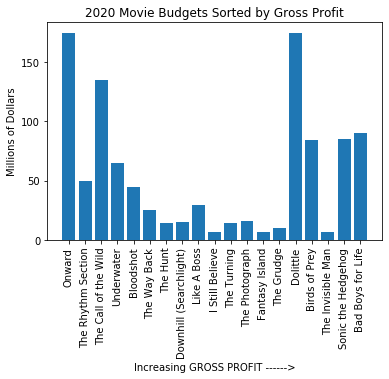

In [4]:
#Now plot the data by movie name and budget/ 
plt.yticks([0, 50000000, 100000000, 150000000, 200000000], ['0', '50', '100', '150', '200']);
# add y label for millions of dollars
plt.ylabel('Millions of Dollars');
plt.xlabel('Increasing GROSS PROFIT ------>');
# add a title to the top of the graph
plt.title('2020 Movie Budgets Sorted by Gross Profit');
# rotate x axis labels 90 degrees
plt.xticks(rotation=90);

plt.bar(df_sorted2['MOVIE'], df_sorted2['BUDGET']);

#would be good to add a coloration across the X-axis that maps to sort ranges for Gross Profit) 

Now let's practice loading up our actual datasets and generating plots. Similar to how we used pd.read_excel to load an excel file, we can use pd.read_csv can be used to load a csv file.

Viewing the data this way, it looks like there is one cluster of higher movie budgets associated with the lowest Gross Profits (losses) and another cluster of higher movie budgets associated with the highest gross profits, however, it looks like the sum of the budgets near the low grossing (loss) end of the Profit spectrum is larger than that at the high end. 

This could indicate a weak anti-correlation between film budgets and Gross Profit or that there is no correlation. Let’s use our statistical tests to quantify the correlation. 


Let's test the data sets for normality and linearity. 


(array([8., 2., 2., 1., 3., 0., 0., 1., 0., 2.]),
 array([7.000e+06, 2.380e+07, 4.060e+07, 5.740e+07, 7.420e+07, 9.100e+07,
        1.078e+08, 1.246e+08, 1.414e+08, 1.582e+08, 1.750e+08]),
 <a list of 10 Patch objects>)

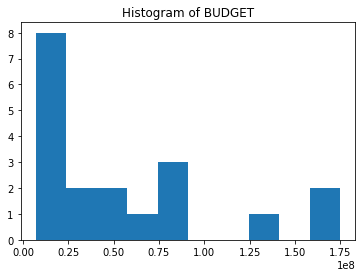

In [5]:
# Test for normality for Movie BUDGET using the hist function, a histogram, 
# which shows bars with heights that represent the most frequently occurring values for Budget in the data. 
from matplotlib import pyplot 
plt.title('Histogram of BUDGET');
pyplot.hist(df_sorted2['BUDGET'])


How to read the plot: Movie budget is on the X-axis and the Y axis shows how many movies fit in each of the bar's budget category. For example, the plot shows eight movies that have budgets between 0 and 25 million dollars. 

The most frequently occurring BUDGET values skew to the low end of the movie budgets. This histogram does not show a Bell Curve so budget is not a normally distributed variable. For further explanation on how to test for normality in Python, refer to: https://www.statology.org/normality-test-python/ 

### Exercise

1. In the cell below make a histogram for the GROSS PROFIT data. 

2. Give it an approproate title.

3. Does the GROSS PROFIT Data look normally distributed?

4. What Gross profit range contains most of the movies? 

In [6]:
# TO DO: Let's look at the histogram for GROSS PROFIT.


## Let's look at the linearity or monotonicity of the data using a scatter plot. 

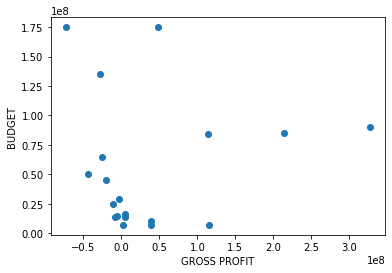

In [7]:
# Scatter plot  GROSS PROFIT vs 
plt.scatter(df_sorted2['GROSS PROFIT'], df_sorted2['BUDGET'])

plt.ylabel('BUDGET');
plt.xlabel('GROSS PROFIT');

There does seem to be a small clustering of the data in the lower left of the plot, where 12 points fall in what might be a negatively sloping monotonic trend. There are however, 7 points that don't seem to be part of that trend, so it is not a strong trend.

## Determining What Correlation Test to Use 
Looks like we don't have a normal distribution for our data, so the Pearson Coefficient won't be a good way to quantify the correlation.

Since more than half our data seems to display a monotonic trend, let's look at the Spearman correlation using the scipy stats package. 

In [8]:
import scipy.stats
from scipy.stats import spearmanr
corr3 = scipy.stats.spearmanr(df_sorted2['BUDGET'], df_sorted2['GROSS PROFIT'])
corr3

SpearmanrResult(correlation=-0.16358895993917005, pvalue=0.5033749317021476)

## Interpreting the Spearman Rank Score and P-value
 
The Spearman rank is small and negative, which might indicate a very week monotonic anti-correlation between BUDGET and GROSS PROFIT. However, Scipy also gives the p-value, P-values near 1 indicate low statistical significance for the correlation and P values near 0 indicate high statistical significance. The P-value for this is ~0.5, which indicates only a moderate chance that the weak anti-correlation seen in this data is statistically significant.

Let us explore if there is a statistically significant correlation (p-value < 0.05) between other variables, such as the gross profit and the multiplier. 

- Multiplier: a measure of box-office performance, which is measured by the total box office (amount of money it makes or number of people who watch the film) divided by its box office on the opening weekend. 

(Source: https://www.the-numbers.com/glossary#:~:text=its%20VOD%20revenue.-,Multiplier,much%20wider%20range%20of%20possibilities, https://www.collinsdictionary.com/us/dictionary/english/box-office#:~:text=When%20people%20talk%20about%20the,million%20at%20the%20box%20office)

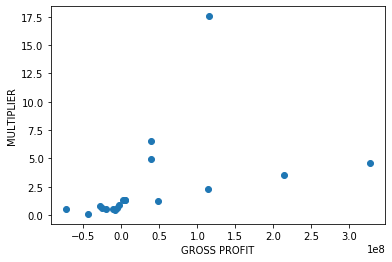

In [9]:
# Plot Scatter plot for Gross Profit and Multiplier
plt.scatter(df_sorted2['GROSS PROFIT'], df_sorted2['MULTIPLIER'])

plt.ylabel('MULTIPLIER');
plt.xlabel('GROSS PROFIT');

In [10]:
# Calculate correlation coefficient between Gross Profit and Multiplier
import scipy.stats
from scipy.stats import spearmanr
corr4 = scipy.stats.spearmanr(df_sorted2['GROSS PROFIT'], df_sorted2['MULTIPLIER'])
corr4

SpearmanrResult(correlation=0.83859649122807, pvalue=7.293998331953686e-06)

### Interpreting a statistically significant p-value
Null hypothesis, H0: There is no [monotonic] association between Gross Profit and the Multiplier

Alternative hypothesis, H1: There is a [monotonic] association between Gross Profit and the Multiplier

Notice that the p-value = 7.29e-06 is less than 0.05, which indicates that there is less than a 5% chance that the strength of the relationship found (spearman's coefficient = 0.84) happened by chance if the null hypothesis were true.

Note: https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide-2.php

## Plotting Correlation Matrix

Another way to visualize the correlation between variables is to use a correlation matrix.
- Each cell in the grid represents the correlation coefficient between 2 variables
- The value at (a,b) represents the correlation coefficient between the variables in row A and column B
- The diagonals have a coefficient coefficient of 1, as it represents the coefficient of each variable with itself

The Pandas package contains a function, `corr` that computes the coefficient matrix between the variables, and allows for the selection of `'method'` of correlation, such as spearman or pearson. 

For more information on how to interpret the correlation matrix, see https://likegeeks.com/python-correlation-matrix/

In [11]:
# Select columns (budget, multiplier, gross profit) to see if there is a correlation between these variables
test = df_sorted2[["BUDGET", "MULTIPLIER", "GROSS PROFIT"]]

In [12]:
# Calculating the correlation matrix using the .corr function in pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the method 
corr_matrix = test.corr(method = 'spearman')
corr_matrix

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,BUDGET,MULTIPLIER,GROSS PROFIT
BUDGET,1.000000,-0.303431,-0.163589
MULTIPLIER,-0.303431,1.000000,0.838596
GROSS PROFIT,-0.163589,0.838596,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

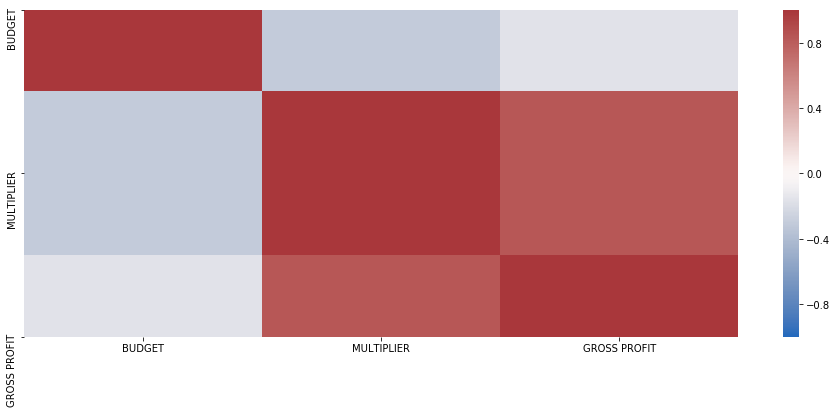

In [13]:
# Plot the Correlation Matrix
plt.figure(figsize=(16, 6))
sns.heatmap(corr_matrix, annot=False, vmax=1, vmin=-1, cmap='vlag')
plt.show

## Moving Forward

Using the "CtyAvDemog2010.csv" dataset, can you apply these statistical tests to test for correlation between the variables?

Apply these principles to Big Question 3:
1. Do counties with many people living below the poverty line have more power outages on average than wealthier counties?
2. Can you use statistical tests to justify your answer?
3. Is what you found true generally for all counties in the study?
4. Is it still true for the counties hardest hit by the heatwave during the heatwave?
5. Are there any other factors expressed in the data that correlate with large numbers of outages per county?